In [13]:
import pandas as pd
import glob

In [14]:
path = ""
files = [file for file in glob.glob(path + "**/*.csv", recursive=True)]

In [15]:
[print(f) for f in files]

Monday-WorkingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv


[None, None, None, None, None, None, None, None]

In [16]:
dataset = [pd.read_csv(f) for f in files]

In [17]:
for d in dataset:
    print(d.shape)

(363823, 79)
(191033, 79)
(170366, 79)
(288602, 79)
(232425, 79)
(225745, 79)
(229128, 79)
(286467, 79)


In [18]:
for i in range(0,len(dataset)):
    if i != len(dataset)-1:
        same_columns = dataset[i].columns == dataset[i+1].columns

        if False in same_columns:
            print(i)
            break

same_columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [19]:
dataset = pd.concat([d for d in dataset]).drop_duplicates(keep=False)
dataset.reset_index(drop=True, inplace = True)

In [20]:
dataset.shape

(1710918, 79)

Data Analysis

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710918 entries, 0 to 1710917
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [22]:
dataset.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.710918e+06,1.710918e+06,1.710918e+06,1.710918e+06,1.710918e+06,1.710918e+06,1.710918e+06,1.710918e+06,1.710918e+06,1.710918e+06,...,1.710916e+06,1.710915e+06,1.710915e+06,1.710915e+06,1.710915e+06,1.710915e+06,1.710915e+06,1.710915e+06,1.710915e+06,1.710915e+06
mean,7.964489e+03,1.881830e+07,1.270921e+01,1.459537e+01,7.079400e+02,2.411682e+04,2.718669e+02,1.836962e+01,7.178785e+01,9.302499e+01,...,7.651990e+00,-2.573017e+03,1.112091e+05,5.504008e+04,2.058968e+05,7.999493e+04,1.010442e+07,7.521471e+05,1.067253e+07,9.519948e+06
std,1.832050e+04,3.692858e+07,9.563504e+02,1.272519e+03,1.235030e+04,2.883845e+06,8.556339e+02,6.732782e+01,2.209954e+02,3.402864e+02,...,8.130960e+02,9.636863e+05,7.556761e+05,4.502664e+05,1.173583e+06,6.760158e+05,2.523762e+07,5.619527e+06,2.621691e+07,2.491269e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,3.120000e+02,2.000000e+00,1.000000e+00,2.600000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,8.361900e+04,2.000000e+00,2.000000e+00,6.600000e+01,1.600000e+02,4.300000e+01,0.000000e+00,3.800000e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,6.202575e+06,7.000000e+00,6.000000e+00,3.730000e+02,3.378000e+03,3.120000e+02,3.600000e+01,5.528571e+01,9.764984e+01,...,3.000000e+00,3.200000e+01,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,5.259626e+06,0.000000e+00,5.259922e+06,5.142683e+06
max,6.553400e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.660000e+07,1.200000e+08,1.200000e+08


In [23]:
print(dataset[' Label'].unique())
len(dataset[' Label'].unique())

['BENIGN' nan 'Bot' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'Infiltration' 'FTP-Patator' 'SSH-Patator'
 'DDoS' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'PortScan']


14

In [24]:
dataset.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,49486,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,609,7,4,484,414,233,0,69.142857,111.967895,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,88,879,9,4,656,3064,313,0,72.888889,136.153814,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,88,1160,9,6,3134,3048,1552,0,348.222222,682.482560,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data = dataset[' Label'].where(dataset[' Label'] != "BENIGN")

<ipython-input-27-ddaf9ee2c49c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(data, palette="Set1")


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]),
 [Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000'),
  Text(140000.0, 0, '140000')])

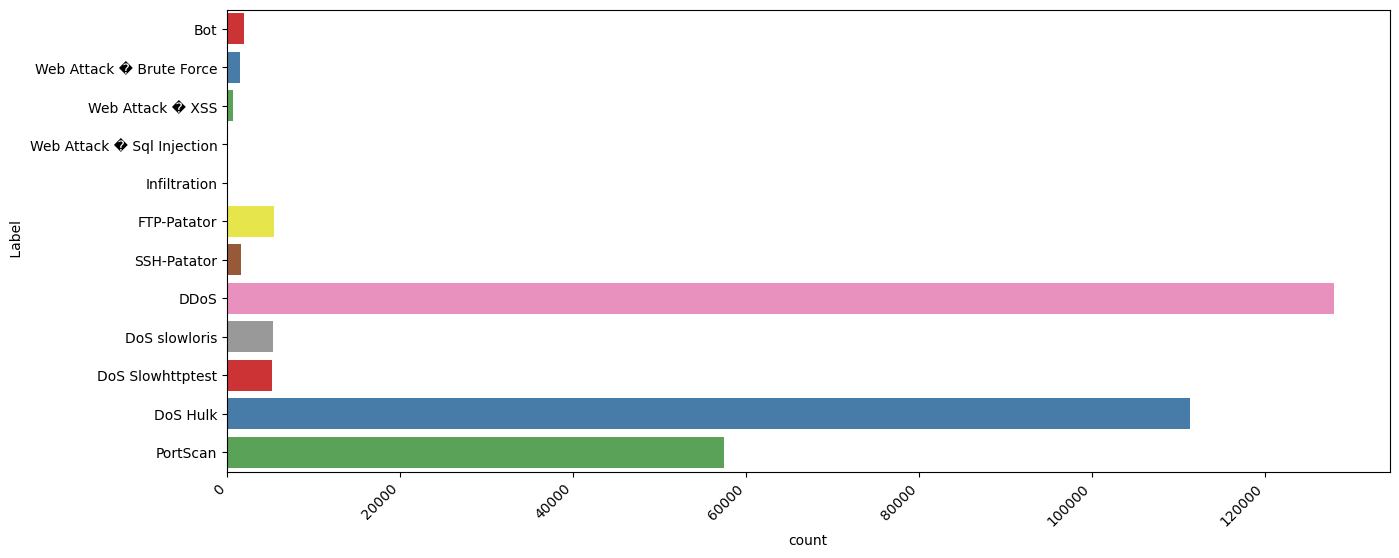

In [27]:
plt.figure(figsize=(15,6))
chart = sns.countplot(data, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

### Data Cleaning

### Renaming columns

In [28]:
# Removing whitespaces in column names.

col_names = [col.replace(' ', '') for col in dataset.columns]
dataset.columns = col_names
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,49486,3,2,0,12,0,6,6,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,609,7,4,484,414,233,0,69.142857,111.967895,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,88,879,9,4,656,3064,313,0,72.888889,136.153814,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,88,1160,9,6,3134,3048,1552,0,348.222222,682.482560,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [50]:
# Use regular expressions to replace wierd characters with dunders.

import re

label_names = dataset['Label'].unique()
label_names = [str(l) for l in label_names]

label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]

label_names, len(label_names)

(['BENIGN',
  'Bot',
  'Web_Attack_Brute_Force',
  'Web_Attack_XSS',
  'Web_Attack_Sql_Injection',
  'Infiltration',
  'FTPPatator',
  'SSHPatator',
  'DDoS',
  'DoS_slowloris',
  'DoS_Slowhttptest',
  'DoS_Hulk',
  'PortScan'],
 13)

In [32]:
# Saving cleaned dataset.

dataset.to_csv("Dataset_clean.csv", index=False)

### Removing NULL values

In [33]:
# Checking if there are any NULL values in the dataset.

dataset.isnull().values.any()

True

In [34]:
# Checking which column/s contain NULL values.

[col for col in dataset if dataset[col].isnull().values.any()]

['FlowBytes/s',
 'FwdIATMax',
 'FwdIATMin',
 'BwdIATTotal',
 'BwdIATMean',
 'BwdIATStd',
 'BwdIATMax',
 'BwdIATMin',
 'FwdPSHFlags',
 'BwdPSHFlags',
 'FwdURGFlags',
 'BwdURGFlags',
 'FwdHeaderLength',
 'BwdHeaderLength',
 'FwdPackets/s',
 'BwdPackets/s',
 'MinPacketLength',
 'MaxPacketLength',
 'PacketLengthMean',
 'PacketLengthStd',
 'PacketLengthVariance',
 'FINFlagCount',
 'SYNFlagCount',
 'RSTFlagCount',
 'PSHFlagCount',
 'ACKFlagCount',
 'URGFlagCount',
 'CWEFlagCount',
 'ECEFlagCount',
 'Down/UpRatio',
 'AveragePacketSize',
 'AvgFwdSegmentSize',
 'AvgBwdSegmentSize',
 'FwdHeaderLength.1',
 'FwdAvgBytes/Bulk',
 'FwdAvgPackets/Bulk',
 'FwdAvgBulkRate',
 'BwdAvgBytes/Bulk',
 'BwdAvgPackets/Bulk',
 'BwdAvgBulkRate',
 'SubflowFwdPackets',
 'SubflowFwdBytes',
 'SubflowBwdPackets',
 'SubflowBwdBytes',
 'Init_Win_bytes_forward',
 'Init_Win_bytes_backward',
 'act_data_pkt_fwd',
 'min_seg_size_forward',
 'ActiveMean',
 'ActiveStd',
 'ActiveMax',
 'ActiveMin',
 'IdleMean',
 'IdleStd',
 'Idl

In [35]:
# Checking how many NULL values it this column contains.

dataset['FlowBytes/s'].isnull().sum()

216

In [36]:
# Considering that only 334 rows contain NULL vlaues in the entire dataset, which makes about 0.01%, we
# can safely remove all NULL rows without spoiling the data.

334/dataset.shape[0]*100


0.01952168368092451

In [37]:
# Removing rows that contain NULL values and checking if number of removed rows is equal to the number of null values.

before = dataset.shape

dataset.dropna(inplace=True)

after = dataset.shape

before[0] - after[0]

219

In [38]:
dataset.isnull().any().any()

False

### Removing non-finite values

In [39]:
import numpy as np

In [40]:
labl = dataset['Label']
dataset = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [41]:
# Checking if all values are finite.

np.all(np.isfinite(dataset))

False

In [42]:
# Checking what column/s contain non-finite values.

nonfinite = [col for col in dataset if not np.all(np.isfinite(dataset[col]))]

In [43]:
# Checking how many non-finite values each column contains.

finite = np.isfinite(dataset['FlowBytes/s']).sum()

dataset.shape[0] - finite

875

In [44]:
# Checking how many non-finite values each column contains.

finite = np.isfinite(dataset['FlowPackets/s']).sum()

dataset.shape[0] - finite

875

In [45]:
dataset = dataset.replace([np.inf, -np.inf], np.nan)

In [46]:
np.any(np.isnan(dataset))

True

In [47]:
dataset = dataset.merge(labl, how='outer', left_index=True, right_index=True)

In [48]:
# Removing new NaN values.

dataset.dropna(inplace=True)

### Data Visualization

In [51]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

In [52]:
np.random.seed(42)

rand_perm = np.random.permutation(dataset.shape[0])

In [56]:
feature_cols = dataset.columns[:-1]

dataset_subset = dataset.loc[rand_perm[:1000],:]

In [69]:
dataset_subset = dataset_subset.replace([np.inf, -np.inf], np.nan)
dataset_subset.dropna(inplace=True)
data_subset = dataset_subset[feature_cols].values

In [70]:
# Performing the principal component analysis. With just 19 components the variance ratio remains 99%, which is great.

pca = PCA(n_components=19)
pca_res = pca.fit_transform(data_subset)

#data_subset = None
np.sum(pca.explained_variance_ratio_)

0.999973917022049

In [72]:
# Computing t-SNE

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
tsne_res = tsne.fit_transform(data_subset)
print("done")

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


done


In [73]:
dataset_subset['tsne_firstD'] = tsne_res[:,0]
dataset_subset['tsne_secondD'] = tsne_res[:,1]

<Axes: xlabel='tsne_firstD', ylabel='tsne_secondD'>

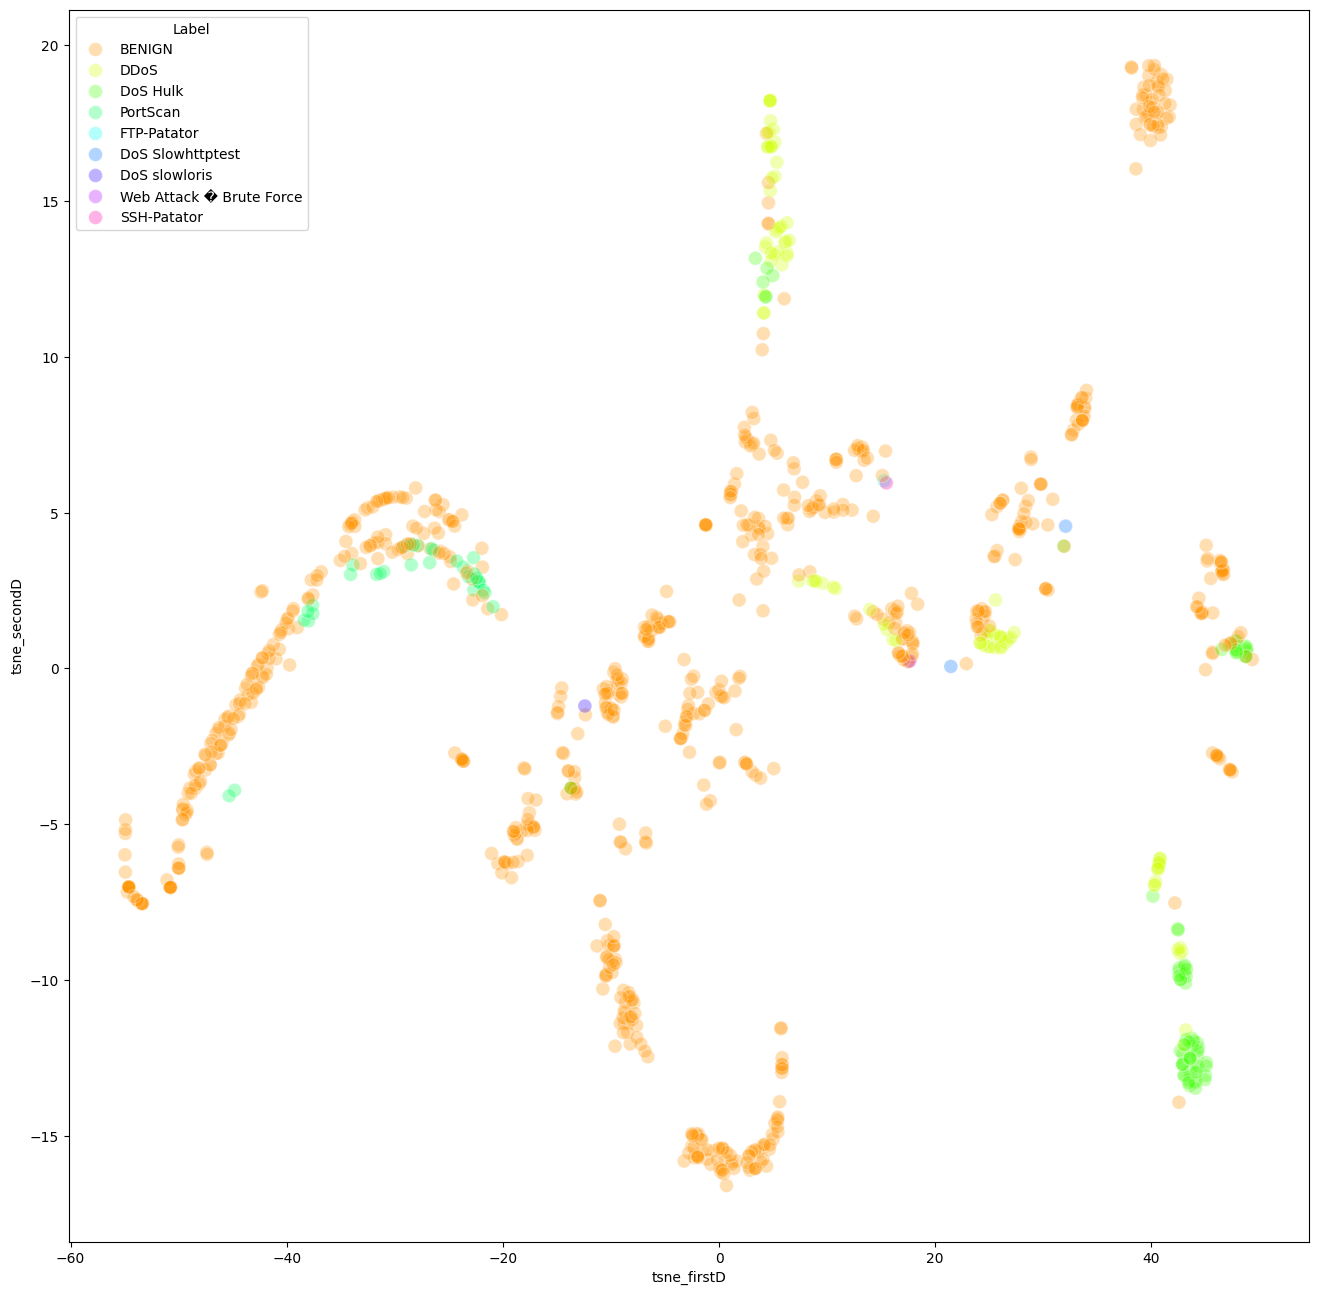

In [81]:
plt.figure(figsize=(16,16))

num_colors = len(dataset_subset['Label'].unique())

sns.scatterplot(
    x="tsne_firstD", y="tsne_secondD",
    palette=sns.color_palette("hsv", num_colors),
    data=dataset_subset,
    hue="Label",
    legend="full",
    alpha=0.3,
    s = 100
)

### Data Preparation

## Scaling data

In [82]:
# Splitting dataset into features and labels.

labels = dataset['Label']
features = dataset.loc[:, dataset.columns != 'Label'].astype('float64')
features.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,49188.0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49486.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,88.0,609.0,7.0,4.0,484.0,414.0,233.0,0.0,69.142857,111.967895,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,88.0,879.0,9.0,4.0,656.0,3064.0,313.0,0.0,72.888889,136.153814,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88.0,1160.0,9.0,6.0,3134.0,3048.0,1552.0,0.0,348.222222,682.482560,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler = RobustScaler()
scaler.fit(features)

features = scaler.transform(features)

features[0]

array([ 1.25917949e+02, -1.34914580e-02,  0.00000000e+00, -4.00000000e-01,
       -1.55619597e-01, -4.73372781e-02, -1.20915033e-01,  1.66666667e-01,
       -6.48985959e-01,  0.00000000e+00, -7.51404494e-02,  0.00000000e+00,
       -3.07178631e-01,  0.00000000e+00,  4.81778100e+01,  5.27512226e+01,
       -3.04798998e-02, -7.15150553e-03, -1.05412315e-02,  0.00000000e+00,
       -1.55913032e-04, -3.78375674e-04,  0.00000000e+00, -1.44990373e-04,
        1.21951220e-02, -1.13170500e-05, -6.46631334e-05,  0.00000000e+00,
       -1.85244360e-05, -4.16666667e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.81818182e-01, -3.03030303e-01,
        7.80048000e+01, -1.24513720e-01,  1.71428571e-01, -7.48959778e-02,
       -2.80621572e-01, -7.98310332e-02, -6.28235009e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
       -3.43169399e-01, -

### Label Encoding

In [84]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

LE.fit(labels)
labels = LE.transform(labels)

np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [85]:
# Checking that encoding reversal works.

d = LE.inverse_transform(labels)
d = pd.Series(d)
d.unique()

array(['BENIGN', 'Bot', 'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'FTP-Patator',
       'SSH-Patator', 'DDoS', 'DoS slowloris', 'DoS Slowhttptest',
       'DoS Hulk', 'PortScan'], dtype=object)

### Splitting the data

In [86]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=.2)

features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((1367859, 78), (341965, 78), (1367859,), (341965,))

### Model Training

In [87]:
import tensorflow as tf
import datetime

In [88]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Flatten(input_shape=(78,)),
    tf.keras.layers.Dense(67, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [90]:
import os

In [91]:
log_dir = os.path.join(
    "train_logs",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)

# TF callback that sets up TensorBoard with training logs.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# TF callback that stops training when best value of validationi loss function is reached. It also
# restores weights from the best training iteration.
eary_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [ ]:
model.fit(features_train,
          labels_train,
          epochs=30,
          callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
42746/42746 ━━━━━━━━━━━━━━━━━━━━ 126s 3ms/step - accuracy: 0.9737 - loss: 0.8687
Epoch 2/30
42746/42746 ━━━━━━━━━━━━━━━━━━━━ 116s 3ms/step - accuracy: 0.9738 - loss: 0.9482
Epoch 3/30
42746/42746 ━━━━━━━━━━━━━━━━━━━━ 145s 3ms/step - accuracy: 0.9737 - loss: 0.5483
Epoch 4/30
42746/42746 ━━━━━━━━━━━━━━━━━━━━ 115s 3ms/step - accuracy: 0.9737 - loss: 0.7850
Epoch 5/30
42746/42746 ━━━━━━━━━━━━━━━━━━━━ 120s 3ms/step - accuracy: 0.9735 - loss: 2.7357
Epoch 6/30
42746/42746 ━━━━━━━━━━━━━━━━━━━━ 136s 3ms/step - accuracy: 0.9735 - loss: 0.6574
Epoch 7/30
42746/42746 ━━━━━━━━━━━━━━━━━━━━ 146s 3ms/step - accuracy: 0.9742 - loss: 11.0740
Epoch 8/30
42746/42746 ━━━━━━━━━━━━━━━━━━━━ 139s 3ms/step - accuracy: 0.9740 - loss: 1.2965
Epoch 9/30
42746/42746 ━━━━━━━━━━━━━━━━━━━━ 148s 3ms/step - accuracy: 0.9737 - loss: 0.8835
Epoch 10/30
14587/42746 ━━━━━━━━━━━━━━━━━━━━ 1:14 3ms/step - accuracy: 0.9745 - loss: 0.7716

In [94]:
# Evaluating model accuracy.
model.evaluate(features_test, labels_test, verbose=2)

10687/10687 - 14s - 1ms/step - accuracy: 0.9769 - loss: 6.1665


[6.166480541229248, 0.9769186973571777]

In [95]:
# Saving the model.

model.save('saved_models/IDS_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.h5')